Import các thư viện cần thiết

In [190]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
notebook_dir = os.getcwd()  
project_root = os.path.abspath(os.path.join(notebook_dir, '../'))  
sys.path.append(project_root)

# Import các hàm từ json_handle
from ml.preprocess.utils.json_handle import (
    merge_data_with_paths,
    read_json,
    merge_json_files,
    write_json
)

ĐỌC DỮ LIỆU TRUNG GIAN ĐỂ EDA 

In [191]:


# READ JSON 
path = "../data/interim/batdongsancomvn/dat/interim_merged_data.json"
data = read_json(path)
for entry in data:
    print(entry.get("area"))
df = pd.DataFrame(data)

# print(df.head())

74.9
60.0
81.0
65.0
1740.0
172.0
98.0
209.8
1558.4
550.0
120.0
70.2
50.0
227.0
60.76
660.0
207.0
80.0
72.0
50.0
118.0
40.0
2140.0
243.0
202.0
115.0
80.0
100.0
100.0
226.0
75.0
103.0
180.0
121.0
86.0
109.0
360.0
300.0
505.0
17820.0
48.0
50.0
155.0
79.0
192.0
100.0
109.0
43.0
393.5
179.0
75.0
103.0
115.0
62.0
75.0
195.7
100.3
42.0
125.0
165.0
165.0
37.0
195.7
103.0
78.0
43.0
42.0
75.0
100.3
115.0
101.0
80.0
63.8
120.0
31.5
100.0
80.0
75.0
135.0
58.0
52.8
135.0
120.0
84.0
430.0
58.0
90.0
75.0
50.4
95.0
40.1
46.3
59.3
85.0
121.9
65.0
78.0
60.0
60.0
42.0
85.0
160.0
75.0
60.3
48.2
121.9
100.0
78.0
60.0
470.0
59.3
3270.0
79.0
7221.0
65.4
610.0
60.0
97.0
55.0
73.0
97.0
88.5
65.9
130.0
100.0
610.0
100.0
100.0
47.3
135.0
74.0
55.0
73.0
102.0
93.0
60.0
79.0
100.9
61.3
100.0
116.0
61.3
74.0
102.0
60.0
93.0
421.0
73.0
100.9
55.0
100.0
147.6
82.0
135.0
430.0
76.0
75.0
114.6
436.0
368.0
147.6
55.0
75.0
191.0
76.0
430.0
114.6
266.0
368.0
106.0
250.0
436.0
130.0
100.0
43.0
68.0
50.0
41.0
56.0
61.0
40.2


Giá trị không phải số trong cột 'price':
[None 'deal']

Số lượng giá trị NaN sau khi chuyển đổi:
frontage                0
access_road_width    1934
area                    0
price                3621
dtype: int64


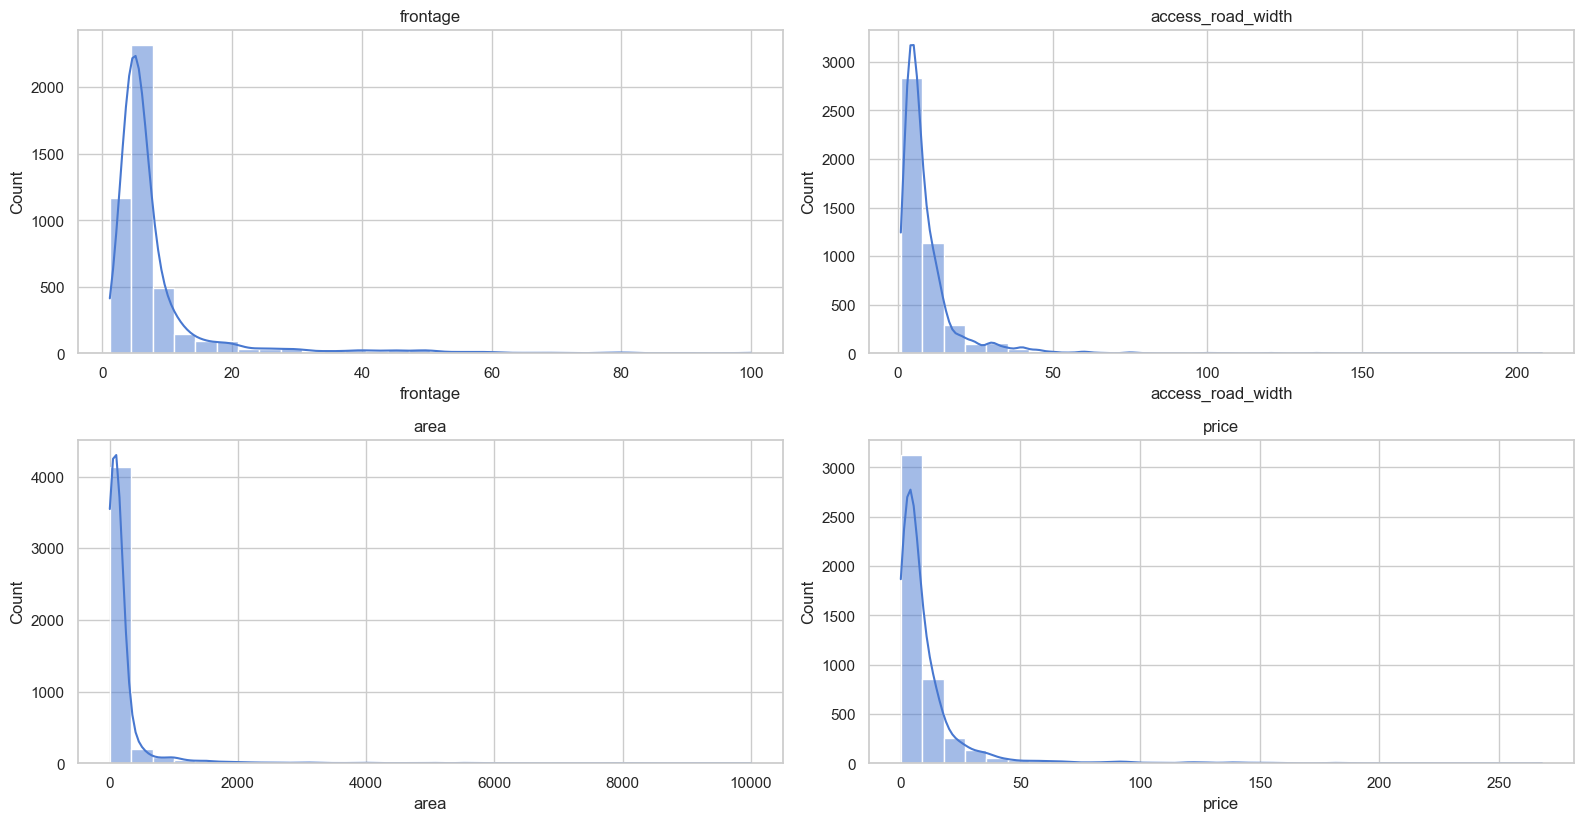

In [192]:
# Vẽ histogram và KDE cho các biến
variables = ['frontage', 'access_road_width', 'area', 'price',]
df_clean = df[variables].copy()
df_clean = df_clean[df_clean['frontage'] <= 100]


for var in variables:
    non_numeric = df_clean[~df_clean[var].apply(lambda x: isinstance(x, (int, float)))][var]
    if not non_numeric.empty:
        print(f"\nGiá trị không phải số trong cột '{var}':")
        print(non_numeric.unique())

# Chuyển đổi các cột thành số, các giá trị không thể chuyển đổi thành NaN
for var in variables:
    df_clean[var] = pd.to_numeric(df_clean[var], errors='coerce')

# Kiểm tra số lượng NaN sau khi chuyển đổi
print("\nSố lượng giá trị NaN sau khi chuyển đổi:")
print(df_clean[variables].isnull().sum())

# Cách 1: Loại bỏ các dòng chứa NaN
df_clean = df_clean.dropna(subset=variables)
df_clean = df_clean[df_clean['price'] <= 300]
df_clean = df_clean[df_clean['area'] <= 10000]

# Vẽ histogram và KDE cho các biến đã làm sạch
plt.figure(figsize=(16, 12))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_clean[var], kde=True, bins=30)
    plt.title(f'{var}')
plt.tight_layout()
plt.show()

Tính hệ số tương quan và mà trận 


Số lượng giá trị NaN sau khi chuyển đổi:
frontage             3409
access_road_width    4627
area                  559
price                5437
longitude             745
latitude              745
dtype: int64


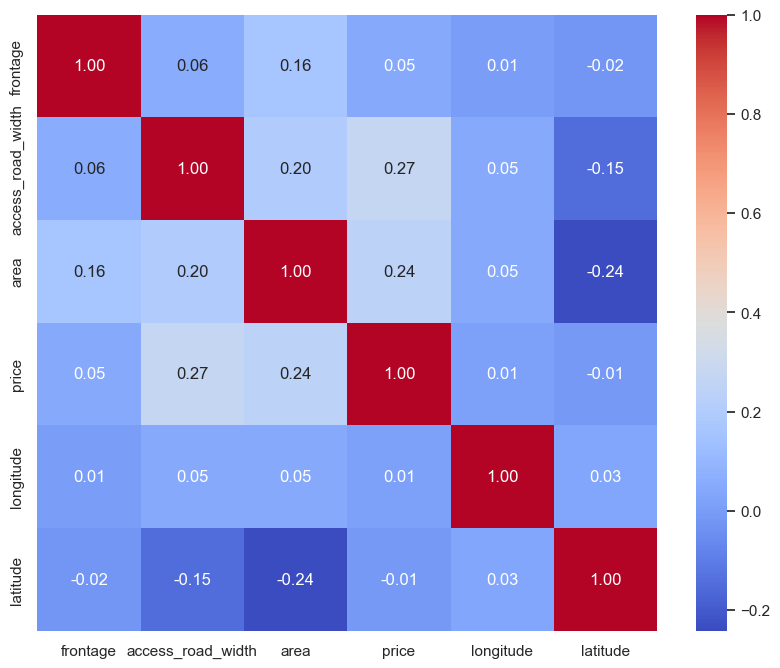

In [193]:
# Tính ma trận tương quan
variables = ['frontage', 'access_road_width', 'area', 'price','longitude','latitude']
df_clean = df[variables].copy()
# Chuyển đổi các cột thành số, các giá trị không thể chuyển đổi thành NaN
for var in variables:
    df_clean[var] = pd.to_numeric(df_clean[var], errors='coerce')

# Kiểm tra số lượng NaN sau khi chuyển đổi
print("\nSố lượng giá trị NaN sau khi chuyển đổi:")
print(df_clean[variables].isnull().sum())

# Cách 1: Loại bỏ các dòng chứa NaN
df_clean = df_clean.dropna(subset=variables)
df_clean = df_clean[df_clean['price'] <= 300]
df_clean = df_clean[df_clean['area'] <= 10000]
correlation_matrix = df_clean.corr()

# Vẽ heatmap của ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Ma Trận Tương Quan giữa các Biến')
plt.show()



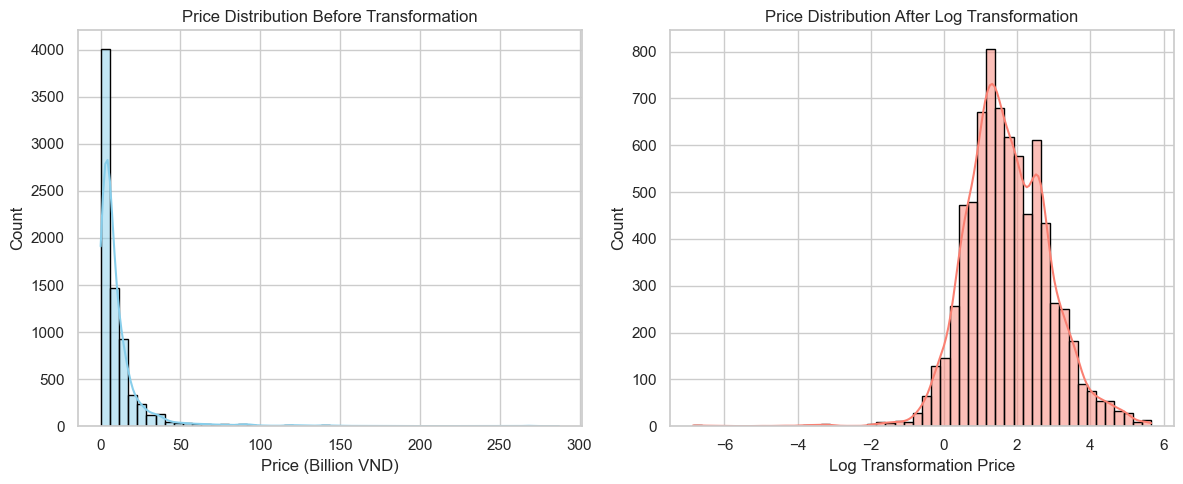

In [194]:
# Chuyển cột 'price' sang kiểu số, các giá trị không phải số sẽ trở thành NaN
data = [entry for entry in data if entry.get("price") != "deal"]

# Tạo DataFrame từ data
df_clean = pd.DataFrame(data)

# Chuyển cột price sang số và loại bỏ NaN
df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')
df_clean = df_clean.dropna(subset=['price'])  # Loại bỏ NaN
df_clean = df_clean[df_clean['price'] <= 300]


# Loại bỏ giá trị price <= 0 (vì log không xác định cho x <= 0)
df_clean = df_clean[df_clean['price'] > 0]

# Thiết lập phong cách và bảng màu
sns.set(style="whitegrid", palette="muted")

# Biểu đồ trước và sau khi biến đổi logarit
plt.figure(figsize=(12, 5))

# Biểu đồ 1: Phân phối giá gốc
plt.subplot(1, 2, 1)
sns.histplot(df_clean['price'], kde=True, color="skyblue", bins=50, edgecolor="black", linewidth=1)
plt.title('Price Distribution Before Transformation')
plt.xlabel('Price (Billion VND)')
plt.ylabel('Count')

# Biểu đồ 2: Phân phối giá logarit
df_clean['log_price'] = np.log(df_clean['price'])  # Logarithm transformation

plt.subplot(1, 2, 2)
sns.histplot(df_clean['log_price'], kde=True, color="salmon", bins=50, edgecolor="black", linewidth=1)
plt.title('Price Distribution After Log Transformation')
plt.xlabel('Log Transformation Price')
plt.ylabel('Count')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [195]:
# Tính toán các thống kê cơ bản
basic_stats = df.describe().T  

# Thêm cột 'median' vì pandas describe() không bao gồm median
# basic_stats['median'] = df.median()

# Chọn và sắp xếp các cột theo thứ tự mong muốn
basic_stats = basic_stats[['mean', 'std', 'min', 'max']]

# Hiển thị các thống kê cơ bản
print(basic_stats)

                         mean          std    min            max
frontage            11.794744    41.281907  1.142     930.000000
access_road_width    9.494039    11.780939  1.000     419.000000
area               479.002980  5831.661069  4.500  370000.000000
longitude          105.844571     2.766427  0.000     115.826343
latitude            20.041187     2.958065  0.000      22.753192


So Sánh frontage và access_road_width

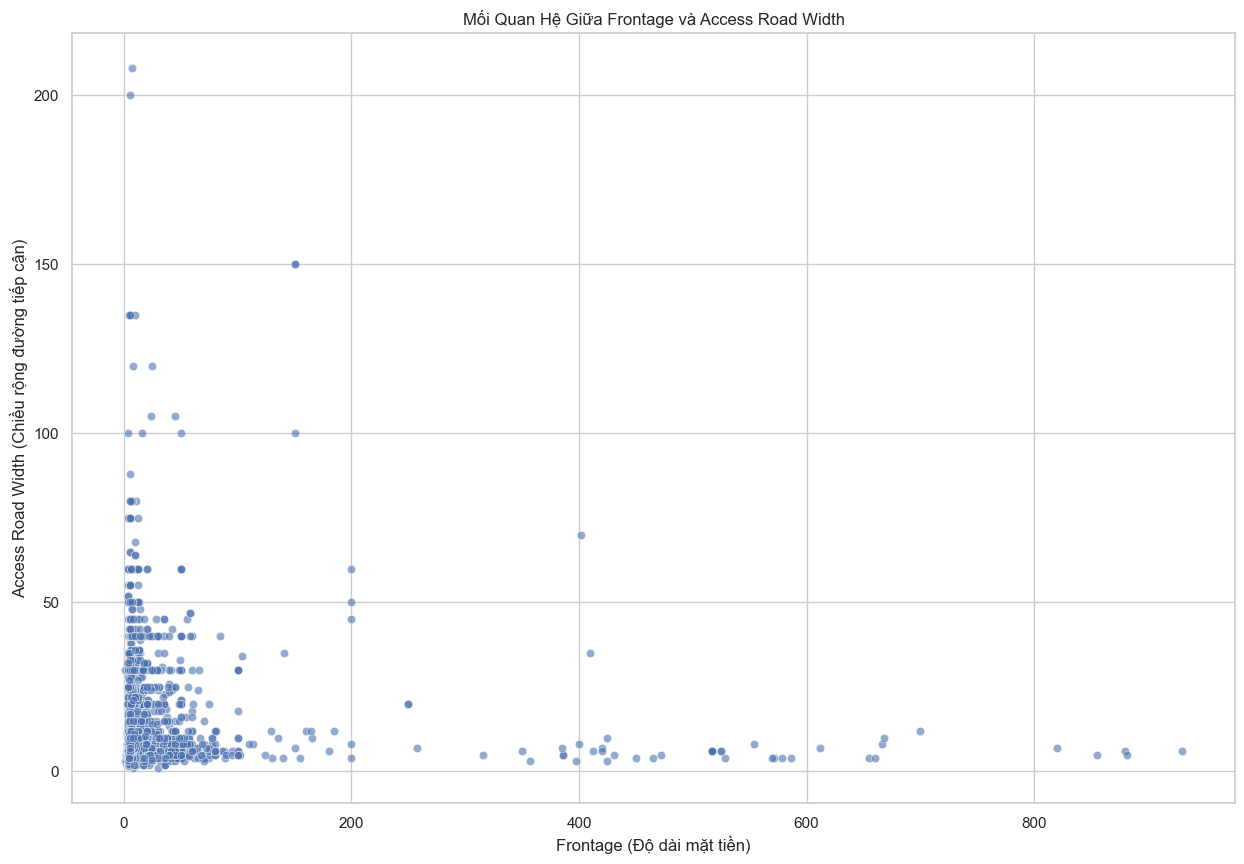

In [196]:
# Thiết lập phong cách cho biểu đồ
sns.set(style="whitegrid")

# Tạo biểu đồ phân tán
plt.figure(figsize=(15, 10))
sns.scatterplot(x='frontage', y='access_road_width', data=df, alpha=0.6)

# Thêm tiêu đề và nhãn trục
plt.title('Mối Quan Hệ Giữa Frontage và Access Road Width')
plt.xlabel('Frontage (Độ dài mặt tiền)')
plt.ylabel('Access Road Width (Chiều rộng đường tiếp cận)')

# Hiển thị biểu đồ
plt.show()

In [197]:
# Đếm số lượng mẫu có 'frontage' lớn hơn 100
num_frontage_gt_100 = (df['frontage'] > 100).sum()

print(f"Số lượng mẫu có 'frontage' lớn hơn 100: {num_frontage_gt_100}")

num_width_gt_100 = (df['access_road_width'] > 100).sum()

print(f"Số lượng mẫu có 'access_road_width' lớn hơn 100: {num_width_gt_100}")

Số lượng mẫu có 'frontage' lớn hơn 100: 82
Số lượng mẫu có 'access_road_width' lớn hơn 100: 17


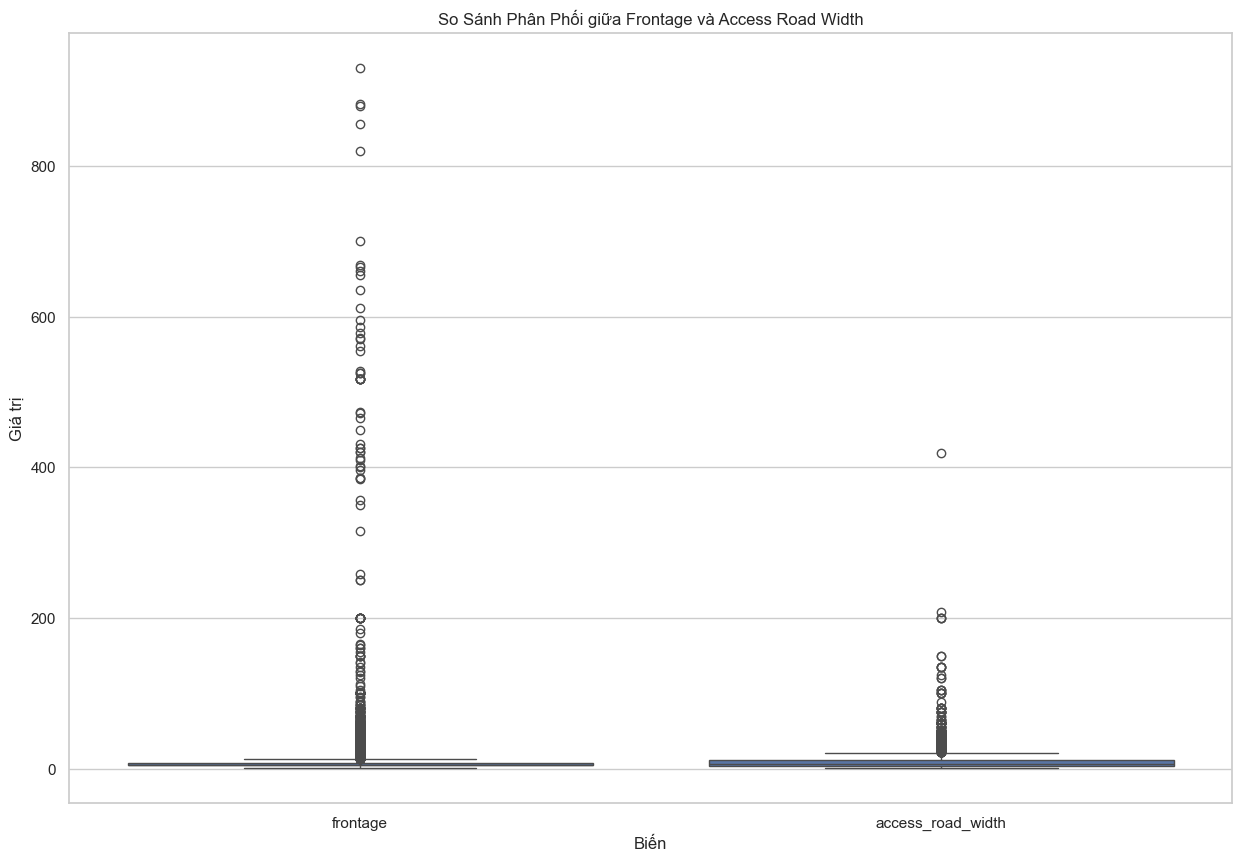

In [198]:
# Tạo DataFrame mới chứa hai biến cần so sánh
df_comparison = df[['frontage', 'access_road_width']].melt(var_name='Variable', value_name='Value')

# Tạo biểu đồ hộp
plt.figure(figsize=(15, 10))
sns.boxplot(x='Variable', y='Value', data=df_comparison)

# Thêm tiêu đề và nhãn trục
plt.title('So Sánh Phân Phối giữa Frontage và Access Road Width')
plt.xlabel('Biến')
plt.ylabel('Giá trị')

# Hiển thị biểu đồ
plt.show()

Kiểm Tra và Xử Lý Giá Trị Thiếu trong longitude và ladtitude 

In [199]:
# Kiểm tra số lượng giá trị 0 trong longitude và latitude
num_zero_longitude = (df['longitude'] == 0).sum()
num_zero_latitude = (df['latitude'] == 0).sum()

print(f"Số lượng giá trị 0 trong longitude: {num_zero_longitude}")
print(f"Số lượng giá trị 0 trong latitude: {num_zero_latitude}")

# Xử lý giá trị 0 nếu cần (ví dụ: loại bỏ hoặc thay thế bằng giá trị trung bình)
# Loại bỏ các dòng có longitude hoặc latitude bằng 0
df = df[(df['longitude'] != 0) & (df['latitude'] != 0)]

print("Dữ liệu sau khi loại bỏ các dòng có longitude hoặc latitude bằng 0:")
print(df[['longitude', 'latitude']].head())

Số lượng giá trị 0 trong longitude: 8
Số lượng giá trị 0 trong latitude: 8
Dữ liệu sau khi loại bỏ các dòng có longitude hoặc latitude bằng 0:
    longitude   latitude
0  105.778854  21.129903
1  105.708958  21.067176
2  105.864056  20.871127
3  105.825919  21.076089
4  105.528791  20.952588


Phát Hiện và Xử Lý Giá Trị Ngoại Lai Sử dụng Boxplot:

(12980, 6)


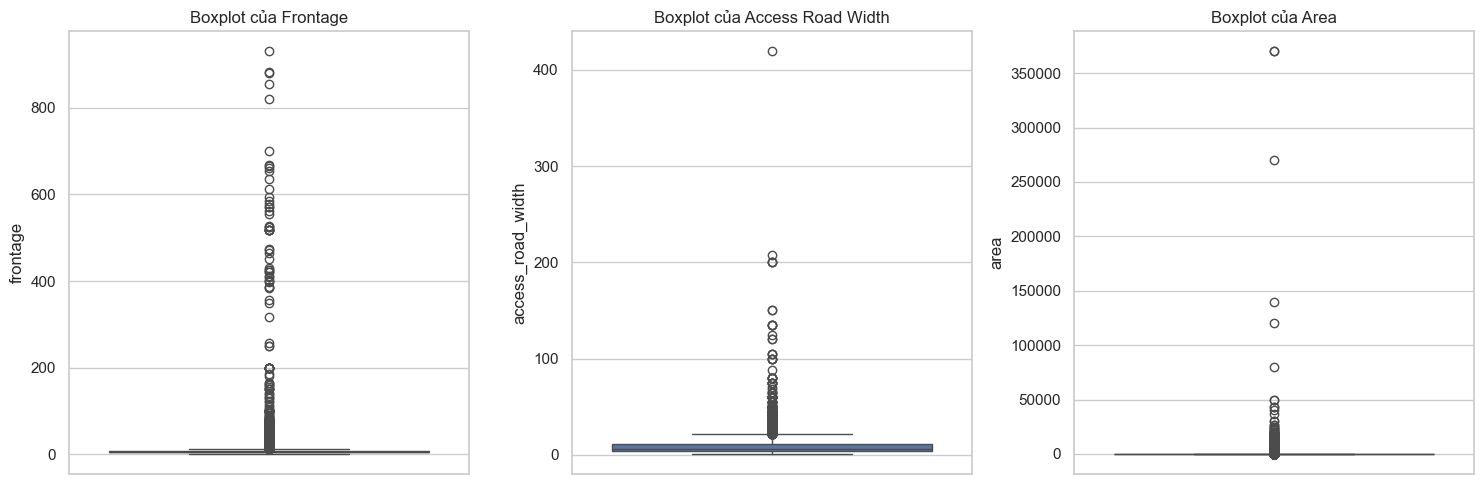

Dữ liệu sau khi loại bỏ ngoại lai: (3690, 7)


In [200]:
# Vẽ boxplot cho các biến có độ lệch chuẩn cao
plt.figure(figsize=(15, 5))
print(df.shape)
plt.subplot(1, 3, 1)
sns.boxplot(y='frontage', data=df)
plt.title('Boxplot của Frontage')

plt.subplot(1, 3, 2)
sns.boxplot(y='access_road_width', data=df)
plt.title('Boxplot của Access Road Width')

plt.subplot(1, 3, 3)
sns.boxplot(y='area', data=df)
plt.title('Boxplot của Area')

plt.tight_layout()
plt.show()
# Loại bỏ các giá trị ngoại lai
variables = ['frontage', 'access_road_width', 'area']
for var in variables:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Lọc dữ liệu chỉ giữ các giá trị trong ngưỡng
    df_clean = df_clean[(df_clean[var] >= lower_bound) & (df_clean[var] <= upper_bound)]

print(f"Dữ liệu sau khi loại bỏ ngoại lai: {df_clean.shape}")

Phát Hiện và Xử Lý Giá Trị Ngoại Lai Sử dụng  Z-Score:

In [201]:
from scipy import stats

# Tính z-score cho các biến
z_scores = np.abs(stats.zscore(df[['frontage', 'access_road_width', 'area']]))

# Ngưỡng z-score để xác định ngoại lai (thường là 3)
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

print(f"Số lượng ngoại lai: {outliers.sum()}")

# Loại bỏ các ngoại lai
df_clean = df[~outliers]

print(f"Dữ liệu sau khi loại bỏ ngoại lai: {df_clean.shape}")

Số lượng ngoại lai: 0
Dữ liệu sau khi loại bỏ ngoại lai: (12980, 6)


Trực Quan Hóa Phân Phối của Các Biến

Tính Hệ Số Tương Quan và Vẽ Ma Trận Tương Quan: 

In [202]:
# # Tính ma trận tương quan
# correlation_matrix = df_clean[['frontage', 'access_road_width', 'area', 'price', 'longitude', 'latitude']].corr()

# # Vẽ heatmap của ma trận tương quan
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.show()

Vẽ Bản Đồ Phân Phối Giá Trị:

In [203]:
import pandas as pd
import folium

# Giả sử dữ liệu của bạn đã được tải vào df_clean
# Kiểm tra số lượng giá trị NaN trong latitude và longitude
print("Trước khi xử lý:")
print("Số lượng NaN trong latitude:", df_clean['latitude'].isna().sum())
print("Số lượng NaN trong longitude:", df_clean['longitude'].isna().sum())

# Loại bỏ các dòng chứa NaN trong latitude hoặc longitude
df_clean = df_clean.dropna(subset=['latitude', 'longitude'])

# Kiểm tra và loại bỏ các giá trị ngoài phạm vi hợp lệ cho latitude và longitude
df_clean = df_clean[(df_clean['latitude'] >= -90) & (df_clean['latitude'] <= 90)]
df_clean = df_clean[(df_clean['longitude'] >= -180) & (df_clean['longitude'] <= 180)]

# Kiểm tra lại sau khi xử lý
print("\nSau khi xử lý:")
print("Số lượng NaN trong latitude:", df_clean['latitude'].isna().sum())
print("Số lượng NaN trong longitude:", df_clean['longitude'].isna().sum())

# Tạo bản đồ tại trung tâm dựa trên trung bình của latitude và longitude
map_center = [df_clean['latitude'].mean(), df_clean['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Thêm các điểm vào bản đồ
for idx, row in df_clean.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=1,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

# Lưu bản đồ vào tệp HTML
m.save('land_prices_map.html')

print("\nBản đồ đã được lưu thành công vào 'land_prices_map.html'")

Trước khi xử lý:
Số lượng NaN trong latitude: 745
Số lượng NaN trong longitude: 745

Sau khi xử lý:
Số lượng NaN trong latitude: 0
Số lượng NaN trong longitude: 0

Bản đồ đã được lưu thành công vào 'land_prices_map.html'


Biến Đổi Dữ Liệu

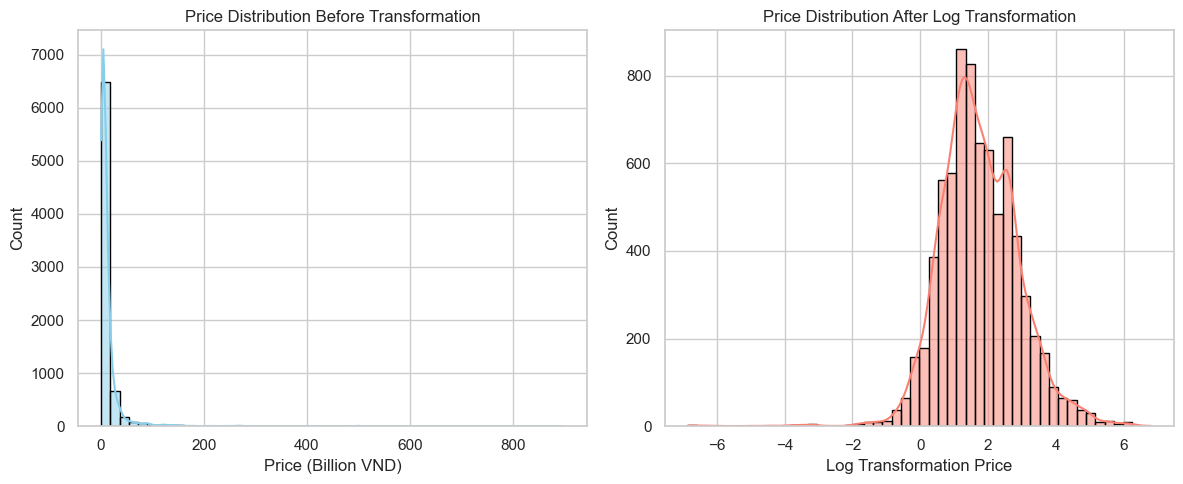

In [204]:
# Chuyển cột 'price' sang kiểu số, các giá trị không phải số sẽ trở thành NaN
data = [entry for entry in data if entry.get("price") != "deal"]

# Tạo DataFrame từ data
df_clean = pd.DataFrame(data)

# Chuyển cột price sang số và loại bỏ NaN
df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')
df_clean = df_clean.dropna(subset=['price'])  # Loại bỏ NaN

# Loại bỏ giá trị price <= 0 (vì log không xác định cho x <= 0)
df_clean = df_clean[df_clean['price'] > 0]

# Thiết lập phong cách và bảng màu
sns.set(style="whitegrid", palette="muted")

# Biểu đồ trước và sau khi biến đổi logarit
plt.figure(figsize=(12, 5))

# Biểu đồ 1: Phân phối giá gốc
plt.subplot(1, 2, 1)
sns.histplot(df_clean['price'], kde=True, color="skyblue", bins=50, edgecolor="black", linewidth=1)
plt.title('Price Distribution Before Transformation')
plt.xlabel('Price (Billion VND)')
plt.ylabel('Count')

# Biểu đồ 2: Phân phối giá logarit
df_clean['log_price'] = np.log(df_clean['price'])  # Logarithm transformation

plt.subplot(1, 2, 2)
sns.histplot(df_clean['log_price'], kde=True, color="salmon", bins=50, edgecolor="black", linewidth=1)
plt.title('Price Distribution After Log Transformation')
plt.xlabel('Log Transformation Price')
plt.ylabel('Count')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Chuẩn hoá dữ liệu

In [205]:
from sklearn.preprocessing import StandardScaler

# Tạo cột road_area nếu chưa tồn tại
if 'road_area' not in df_clean.columns:
    df_clean['road_area'] = df_clean['frontage'] * df_clean['access_road_width']

# Kiểm tra các cột số lượng để chuẩn hóa
numerical_vars = ['frontage', 'access_road_width', 'area', 'road_area', 'longitude', 'latitude']

# Đảm bảo tất cả các cột cần chuẩn hóa đều tồn tại
missing_columns = [col for col in numerical_vars if col not in df_clean.columns]
if missing_columns:
    print(f"Các cột sau không tồn tại trong DataFrame: {missing_columns}")
else:
    # Khởi tạo scaler
    scaler = StandardScaler()

    # Chuẩn hóa
    df_clean[numerical_vars] = scaler.fit_transform(df_clean[numerical_vars])

    # Kiểm tra dữ liệu sau khi chuẩn hóa
    print(df_clean[numerical_vars].head())

   frontage  access_road_width      area  road_area  longitude  latitude
0 -0.174163          -0.272184 -0.060083  -0.142224  -0.046842  0.427051
4 -0.159318          -0.272184 -0.056920  -0.137575  -0.002001  0.392115
5 -0.035606                NaN -0.041615        NaN  -0.036089  0.344474
7  0.582951           0.507545  0.004958   0.501654  -0.056518  0.414080
8       NaN                NaN -0.053909        NaN  -0.018872  0.387081


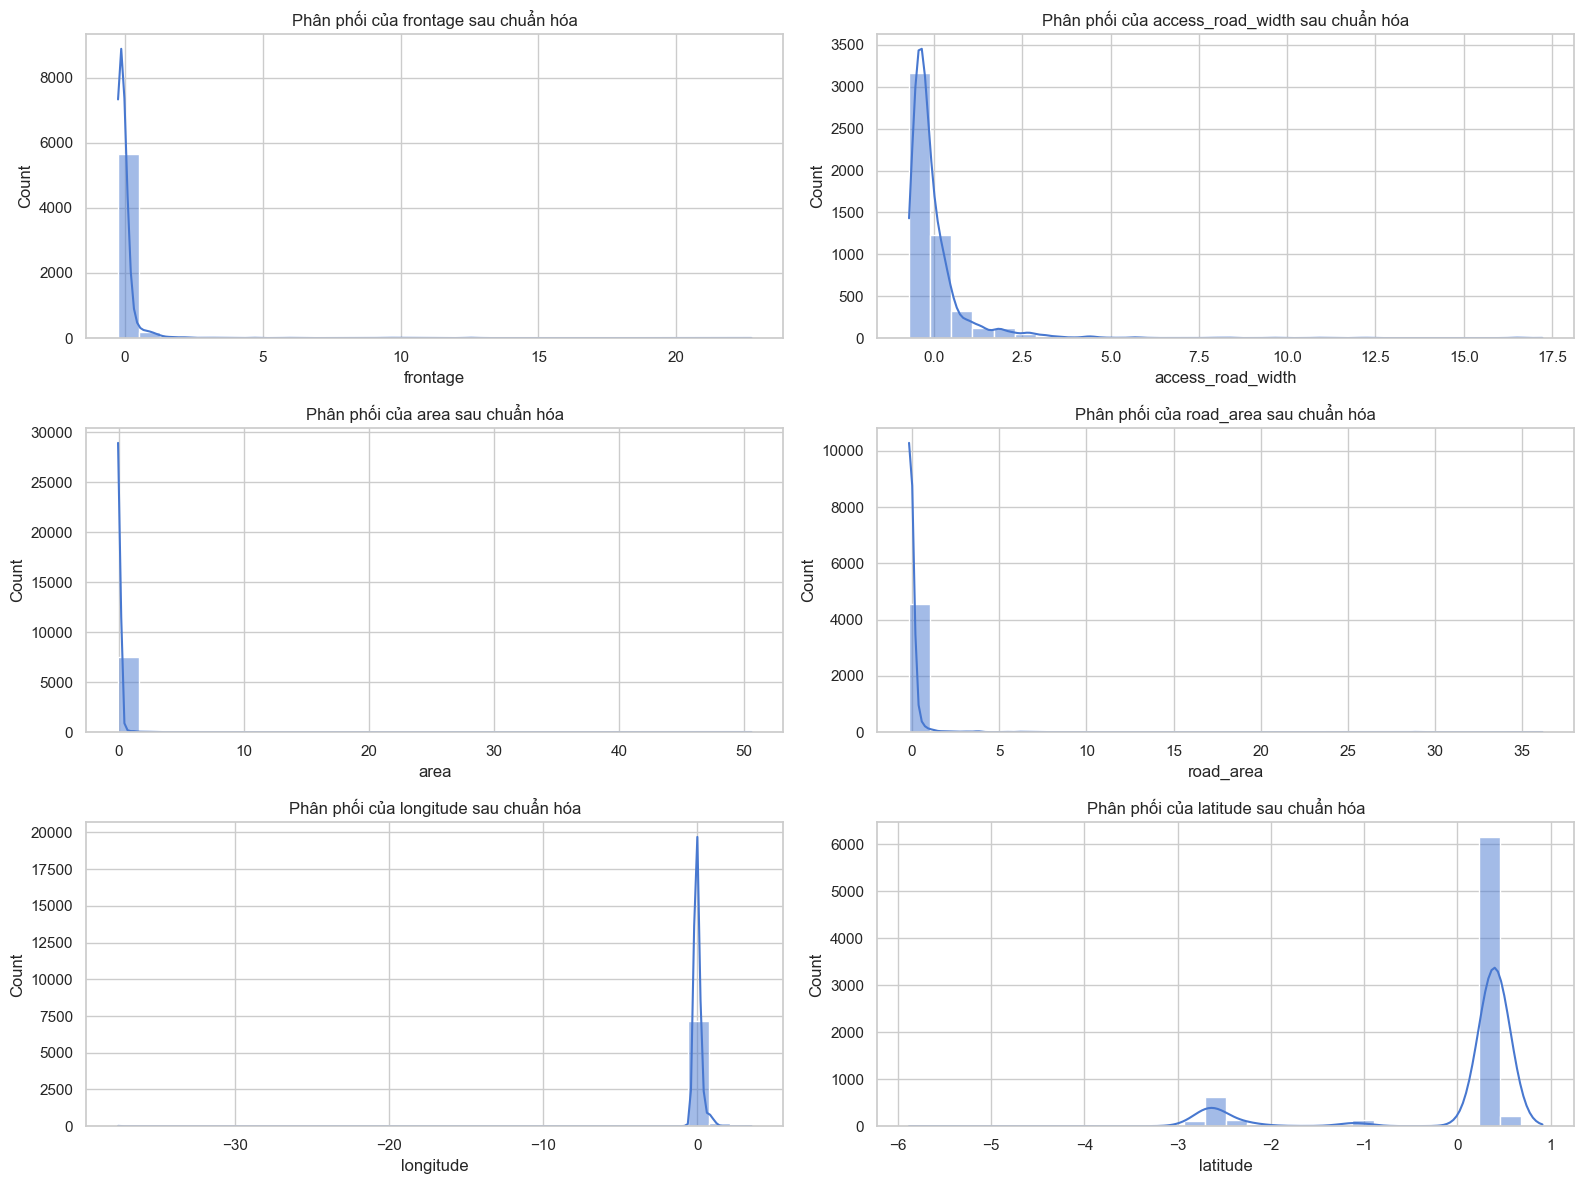

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ histogram cho từng biến
numerical_vars = ['frontage', 'access_road_width', 'area', 'road_area', 'longitude', 'latitude']
plt.figure(figsize=(16, 12))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_clean[var], kde=True, bins=30)
    plt.title(f'Phân phối của {var} sau chuẩn hóa')
plt.tight_layout()
plt.show()